In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
    
import sys 
sys.path.insert(0, '../src/')

import warnings; warnings.simplefilter('ignore')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc

In [26]:
fid_theta = [1.8, -0.2, 0.4, 10.1]

saving the accretion masses!
writing out the subhalo data
writing out the host data


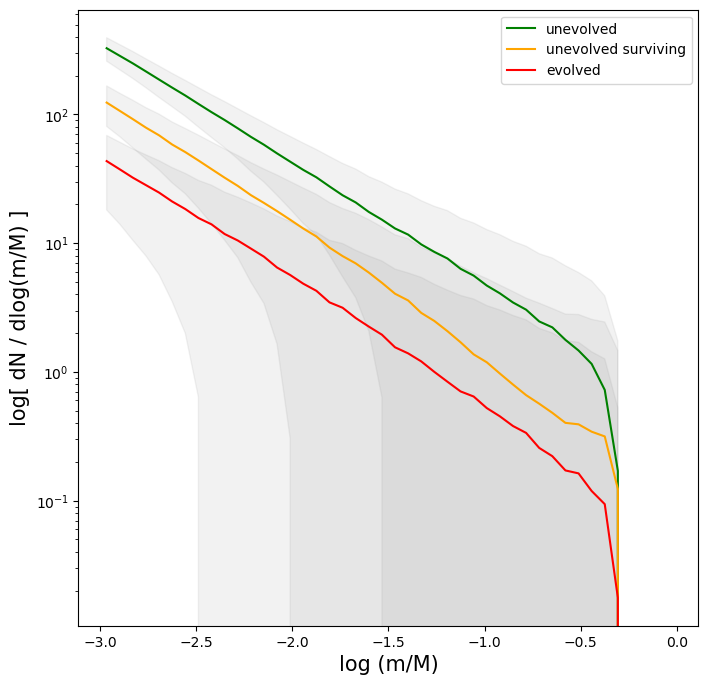

In [5]:
jsm_halopull.MassMat("../../data/MW-analog/NvM/100/")

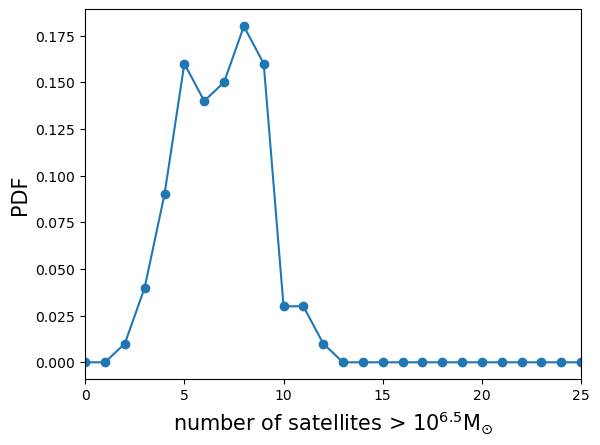

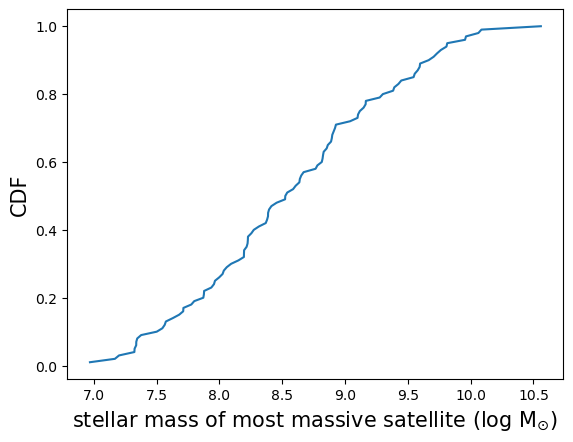

In [34]:
m100 = jsm_mcmc.mock_data(fid_theta, jsm_SHMR.anchor, 0, "../../data/MW-analog/NvM/100/jsm_MCMC.npy")
m100.get_stats(6.5)
m100.save_data("../../data/MW-analog/NvM/100/data.npy")

In [31]:
np.array([m100.lgMs, m100.lgMs])

(2, 100, 1749)

saving the accretion masses!
writing out the subhalo data
writing out the host data


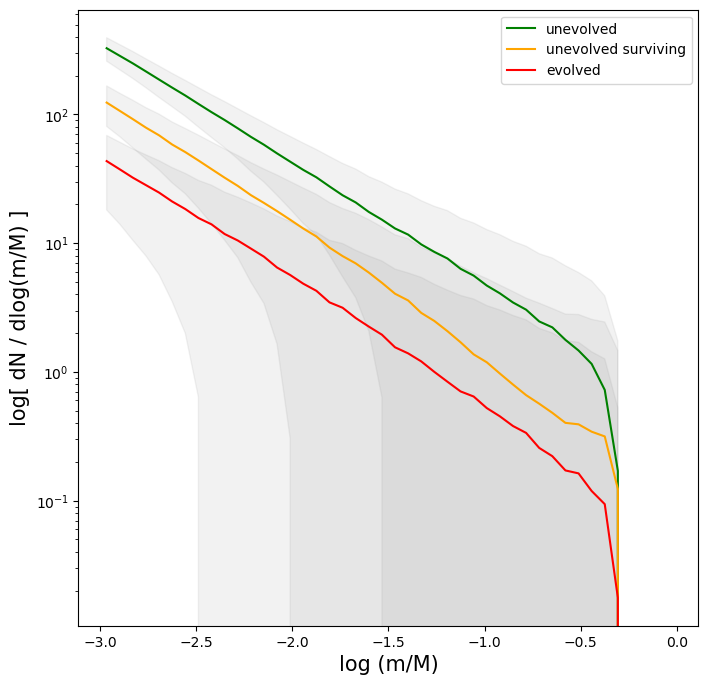

In [6]:
jsm_halopull.MassMat("../../data/MW-analog/NvM/500/", Nsamp=500)

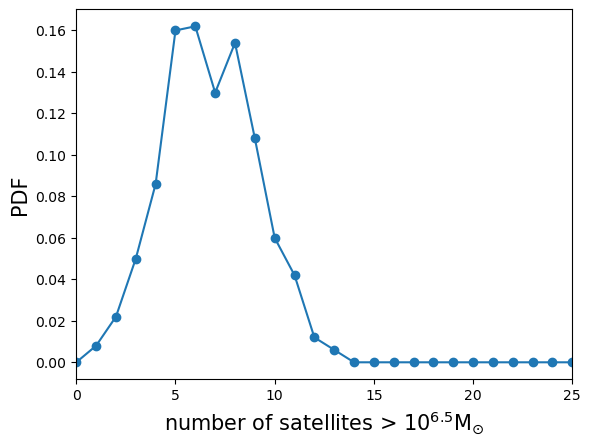

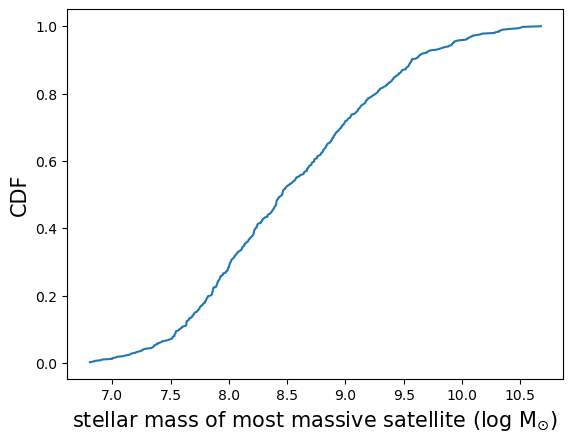

In [35]:
m500 = jsm_mcmc.mock_data(fid_theta, jsm_SHMR.anchor, 0, "../../data/MW-analog/NvM/500/jsm_MCMC.npy")
m500.get_stats(6.5)
m500.save_data("../../data/MW-analog/NvM/500/data.npy")

saving the accretion masses!
writing out the subhalo data
writing out the host data


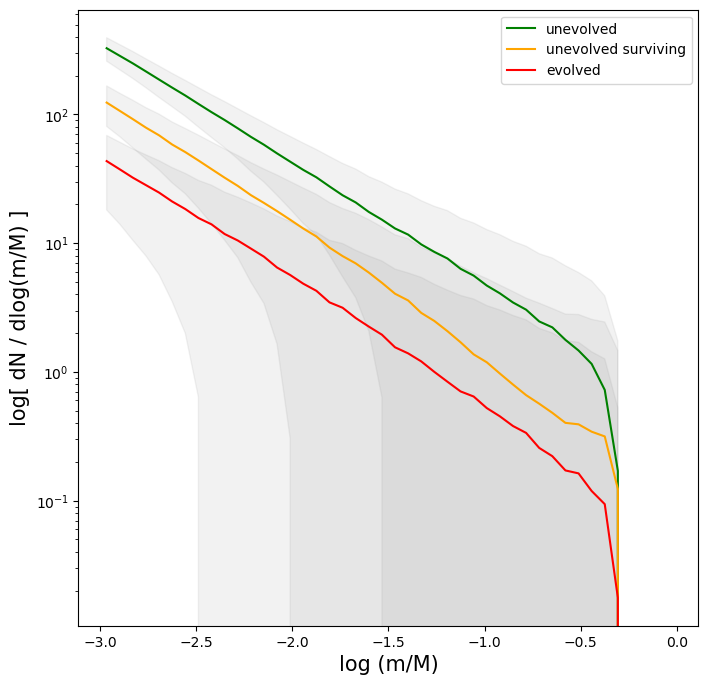

In [7]:
jsm_halopull.MassMat("../../data/MW-analog/NvM/1000/", Nsamp=1000)

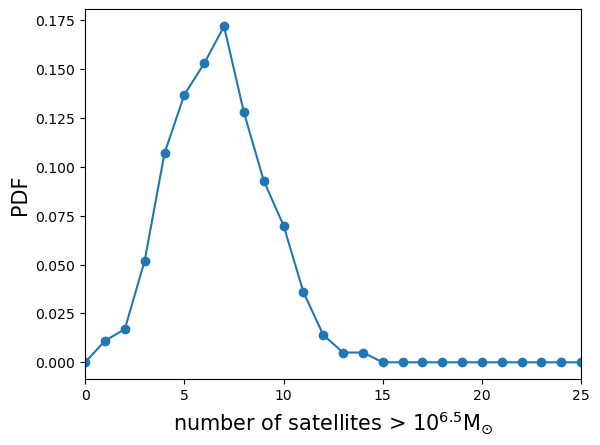

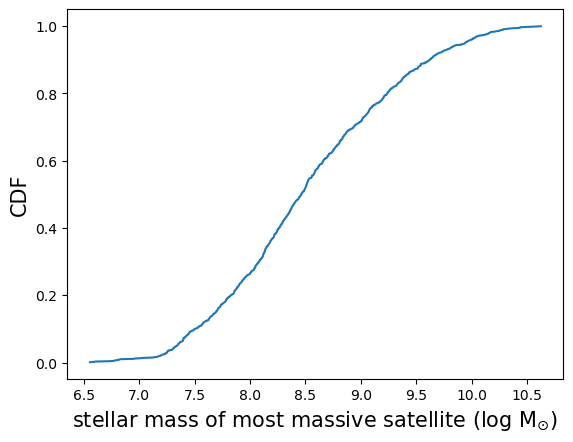

In [36]:
m1000 = jsm_mcmc.mock_data(fid_theta, jsm_SHMR.anchor, 0, "../../data/MW-analog/NvM/1000/jsm_MCMC.npy")
m1000.get_stats(6.5)
m1000.save_data("../../data/MW-analog/NvM/1000/data.npy")

saving the accretion masses!
writing out the subhalo data
writing out the host data


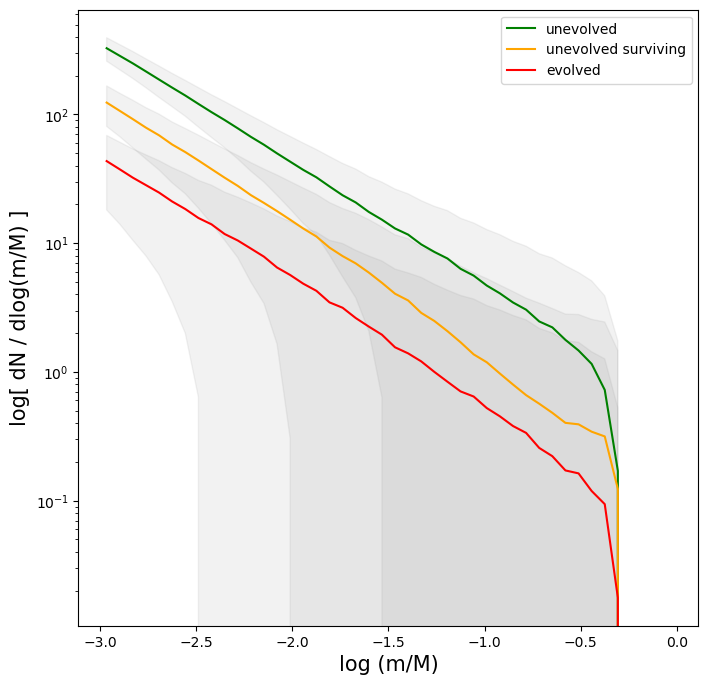

In [8]:
jsm_halopull.MassMat("../../data/MW-analog/NvM/5000/", Nsamp=5000)

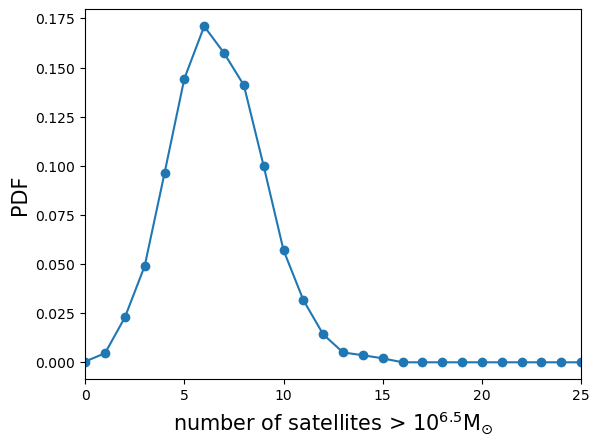

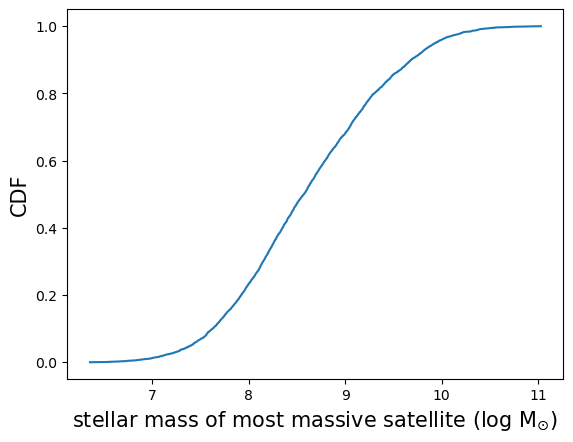

In [37]:
m5000 = jsm_mcmc.mock_data(fid_theta, jsm_SHMR.anchor, 0, "../../data/MW-analog/NvM/5000/jsm_MCMC.npy")
m5000.get_stats(6.5)
m5000.save_data("../../data/MW-analog/NvM/5000/data.npy")

In [39]:
np.load("../../data/MW-analog/NvM/100/data.npy")

array([[[ 9.17210591,  9.24761723,  9.33293581, ...,         nan,
                 nan,         nan],
        [ 9.81565526, 10.90517689,  9.17634023, ...,         nan,
                 nan,         nan],
        [10.22863356,  9.20585348,  9.06239223, ...,         nan,
                 nan,         nan],
        ...,
        [ 9.30915184,  9.62910088, 10.49370621, ...,         nan,
                 nan,         nan],
        [ 9.44146311,  9.38990604,  9.13581997, ...,         nan,
                 nan,         nan],
        [ 9.49674142,  9.42766946,  9.48660807, ...,         nan,
                 nan,         nan]],

       [[ 3.89179776,  4.16140371,  4.57262141, ...,         nan,
                 nan,         nan],
        [ 5.91666426,  8.36465545,  3.80544049, ...,         nan,
                 nan,         nan],
        [ 7.17112238,  4.40866032,  3.94059572, ...,         nan,
                 nan,         nan],
        ...,
        [ 5.0364301 ,  6.19755194,  7.88702314, ...,  